# Compare three tests results for balanced-biaxial straining of the IF steel

- In the following, an experimental analysis is carried out using the 'rs.StressAnalysis'

In [1]:
%pylab inline

import RS
reload(RS)
from RS import analyze_proto
reload(analyze_proto)

Populating the interactive namespace from numpy and matplotlib


<module 'RS.analyze_proto' from '/Users/yj/anaconda/lib/python2.7/site-packages/RS/analyze_proto.pyc'>

Below two blocks in what follows are not concern the stress analysis.
However, it may be useful for those who want to use their own data
with the current example.


In [2]:
## format of the *.sff file - Following the convention of Thomas' PF program sff file
import os;
f=os.popen('head ../dat/BB/YJ_BB_10times.sff');
d=f.read()
print d

180	45	1.377	-1.221	0	0	0	0.023	0.000027		180	45	1.377	-1.221	0	0	0	0.023	-0.000005		180	45	1.346	-1.120	0	0	0	0.022	-0.00003		180	45	1.288	-1.332	0	0	0	0.023	-0.000054		180	45	0.956	-1.111	0	0	0	0.018	-0.000010


In [3]:
## format of the fref file - as of now, fref is following the convention used in Thomas' PF program
f=os.popen('head -n 5 ../dat/BB/Bsteel_fref_DIC.txt')
d=f.read()
print d

# note that the first line is discarded in the current application.
# Depending on your data, you may need to write the information on the Bsteel_fref_DIC.txt file.

igbulk.sff        MajorStrainColumn: 2
  filename      E_xx      E_yy
11JUL12_0007   -0.0001 -0.0014
11JUL12_0008  +0.0049 +0.0064
11JUL12_0009  +0.0093 +0.0120



---------------------------------------------
Strain information where SF/IG were measured
requires either fc or fn_str specified
If not the strain column in fn_sf is used,
subsequent analysis is performed by assuming
that the sample is in equibiaxial strain
---------------------------------------------

Gain Correction: P/G(s)

   
Gain Correction: P/G(s)

   
Gain Correction: P/G(s)

   
Gain Correction: P/G(s)

   
Gain Correction: P/G(s)

   
Gain Correction: P/G(s)

   
Gain Correction: P/G(s)

   
Gain Correction: P/G(s)

   
Gain Correction: P/G(s)

   
Gain Correction: P/G(s)

   
Gain Correction: P/G(s)

   
Gain Correction: P/G(s)

   
Gain Correction: P/G(s)

   
Gain Correction: P/G(s)

   
Gain Correction: P/G(s)

   
Gain Correction: P/G(s)

   
Gain Correction: P/G(s)

   
Gain Correction: P/G(s)

   
Gain Correction: P/G(s)

   
Gain Correction: P/G(s)

   

#-----------------------------------------------------#
 Interpolate SF and IG for matching with D-spacings
  ** 

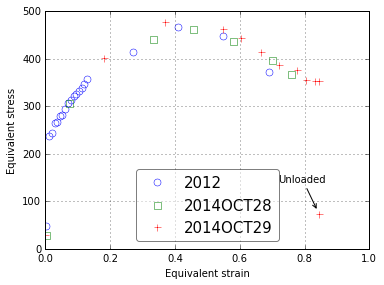

In [4]:
## plastic strain of the points where the X-ray d-spacing
## were meausured at important information.
## If, fc or fn_str are not given, the below application
## bases on the strain given in the fref file -
## the two major strain components are used with assumption
## that the sample was in 'equi-biaxial' strain.

RS_2012=analyze_proto.main(path='../dat/BB',
                           fn_sf='../dat/BB/YJ_BB_10times.sff',
                           fref='../dat/BB/Bsteel_fref_DIC.txt',iwgt=False,
                           ind_plot=False)
RS_2014OCT28=analyze_proto.main(path='../dat/2014OCT28-29/2014OCT28',iwgt=False,
                                fn_sf='../dat/BB/YJ_BB_10times.sff',
                                fref='../dat/2014OCT28-29/2014OCT28/ref.txt',
                                ind_plot=False)
RS_2014OCT29=analyze_proto.main(path='../dat/2014OCT28-29/2014OCT29',iwgt=False,
                                fn_sf='../dat/BB/YJ_BB_10times.sff',
                                fref='../dat/2014OCT28-29/2014OCT29/ref.txt',
                                ind_plot=False)

plot(RS_2012.EXP.flow.epsilon_vm, RS_2012.flow.sigma_vm,'o',mfc='None',mec='b',label='2012')
plot(RS_2014OCT28.EXP.flow.epsilon_vm, RS_2014OCT28.flow.sigma_vm,'s',mfc='None',mec='g',label='2014OCT28')
plot(RS_2014OCT29.EXP.flow.epsilon_vm, RS_2014OCT29.flow.sigma_vm,'+',label='2014OCT29')
annotate('Unloaded',xy=(0.84,80),xycoords='data',xytext=(0.72,140),arrowprops=dict(arrowstyle='->'))
legend(loc='best',fontsize=15, fancybox=True).get_frame().set_alpha(0.5)

gca().set_xlabel('Equivalent strain')
gca().set_ylabel('Equivalent stress')
grid('on')
gca().set_xlim(0.,1.0)
gcf().savefig('/Users/yj/Downloads/compr_wgt.pdf')

In [5]:
from MP.lib import mpl_lib, axes_label
mpl_lib.wide_fig

<function MP.lib.mpl_lib.wide_fig>

In [6]:
from RS import lib
sin2psi_wind=lib.sin2psi_bounds

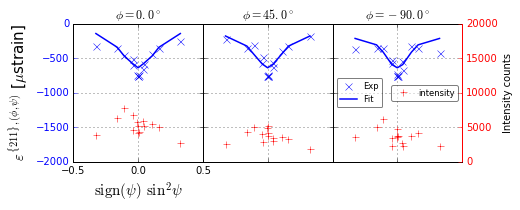

In [7]:
istp=13

dataContainer=RS_2012

fig=mpl_lib.wide_fig(
    ifig=111,nw=3,w0=0,ws=0.5,w1=0,uw=3,
    left=0.15,right=0.25,nh=1,h0=0.2,h1=0,
    down=0.08,up=0.10,iarange=True)

axes=[fig.axes[2],fig.axes[0],fig.axes[1]]

for iphi in xrange(3):
    y = dataContainer.EXP.ehkl[istp,iphi,:]*1e6-dataContainer.IG.ig[istp,iphi,:]*1e6
    x = dataContainer.EXP.psis[::]
    x=np.sign(x)*np.sin(x*np.pi/180.)**2
    axes[iphi].plot(x,y,'bx',label='Exp')
    
    y=dataContainer.Eis[istp,iphi,:]*1e6
    axes[iphi].plot(x,y,'b-',label='Fit')
    
    axes[iphi].set_title(r'$\phi=%3.1f^\circ$'%(dataContainer.EXP.phis[iphi]))
    axes[iphi].locator_params(nbins=4)
    axes_label.__deco__(ax=axes[iphi],iopt=0,hkl='211',ipsi_opt=1)

    axes[iphi].set_ylim(-2000,000)
    axes[iphi].set_xlim(-0.5,0.5)

for iphi in xrange(3):    
    ax=axes[iphi].twinx()
    #axes[iphi].set_xlim(-1.0,1.0)

    intensity = []
    for i in xrange(14):
        intensity.append(dataContainer.EXP.P_scan[istp].protophi[iphi].ppscans[i].ints)

    ax.plot(x,intensity,'r+',label='intensity')
    ax.set_ylim(0.,20000)

    if iphi==0:
        ax.legend(loc='center right')
        ax.set_ylabel('Intensity counts')
    ax.set_xlim(-0.5,0.5)

axes[0].legend(loc='center left')
fig.axes[3].tick_params(axis='y', colors='red')
fig.axes[3].spines['right'].set_color('red')
fig.axes[0].tick_params(axis='y', colors='blue')
fig.axes[0].spines['left'].set_color('blue')

for iphi in xrange(2):
    mpl_lib.rm_lab(fig.axes[iphi+1],axis='x')
    mpl_lib.rm_lab(fig.axes[iphi+1],axis='y')
    mpl_lib.rm_lab(fig.axes[iphi+4],axis='x')
    mpl_lib.rm_lab(fig.axes[iphi+4],axis='y')

fig.savefig('ExpExample.pdf',bbox_inches='tight')
fig.savefig('ExpExample.png',bbox_inches='tight')